# Statistical testing in R

Here, we carry out simple statistical tests including t-test and ANOVA


## Installation of libraries and necessary software

Install the necessary libraries (only needed once) by executing (shift-enter) the following cell:


In [9]:
install.packages("MASS", repos='http://cran.us.r-project.org')
install.packages("perm", repos='http://cran.us.r-project.org')
install.packages("exactRankTests", repos='http://cran.us.r-project.org')
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("qvalue")


Installing package into 'C:/Users/arvid/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'MASS' is in use and will not be installed"Installing package into 'C:/Users/arvid/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'perm' is in use and will not be installed"Installing package into 'C:/Users/arvid/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'exactRankTests' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\arvid\AppData\Local\Temp\RtmpmYHV0A\downloaded_packages


Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'qvalue'
Warning message:
"package 'qvalue' is in use and will not be installed"installation path not writeable, unable to update packages: boot, class,
  cluster, codetools, foreign, lattice, MASS, Matrix, mgcv, nlme, rpart,
  survival
Update old packages: 'lpSolve', 'uroot'


## Loading data and libraries
This requires that the installation above have been finished without error

In [10]:
library("MASS")
library("perm")
library("qvalue")

### Exercise 1
Draw figures that show, for degrees of freedom between 1 and 100, the 5\% critical value of the t-statistic (that is the value above and below which 5\% of the density distribution are located, given by```qt(0.975,df=...)```). 

Plot the distribution on absolute and double-logarithmic scale. 


In [11]:
# add your code here:

#### Add your answers here
(double-click here to edit the cell)

##### Question I:  <u>Which figure provides better visual information about the critical values?</u>

_Answer_

##### Question I:  <u>What does the decrease mean when carrying out statistical tests?</u>

_Answer_


### Exercise 2
Take an artificial data set of three groups

```stat.dat <- data.frame(x=rep(c("A","B","C"),each=10), 
                        y=c(rnorm(10), rnorm(10)+0.5, rnorm(10)-1))
```

a) Do an ANOVA to check whether B and C are significantly different from A

b) Do an ANOVA to check whether A, B and C are significantly different from 0

c) Do an ANOVA to check whether A and C are significantly different from B (you'll have to manually reorder the columns of ```stat.dat```)

d) Calculate a t-test between C and A and compare the result to a)

e) Redo ANOVA on the data set containing only A and C and compare again


In [12]:
num <- 10
stat.dat <- data.frame(x=rep(c("A","B","C"),each=num), 
                       y=c(rnorm(num), rnorm(num)+0.5, rnorm(num)-1))
# a)
summary(lm(y~x, data=stat.dat))
# b)
# ...


Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2582 -0.6173 -0.1611  0.9474  2.4495 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.04414    0.34593   0.128    0.899
xB           0.66875    0.48922   1.367    0.183
xC          -0.26659    0.48922  -0.545    0.590

Residual standard error: 1.094 on 27 degrees of freedom
Multiple R-squared:  0.1257,	Adjusted R-squared:  0.0609 
F-statistic:  1.94 on 2 and 27 DF,  p-value: 0.1632


##### Question II:  <u>Why do you expect the sample groups A, B and C to be different?</u>

_Answer_

##### Question II:  <u>What do the coefficients mean in a) and b)?</u>

_Answer_


##### Question III:  <u>Could one use t-tests to show the cases in b)?</u>

_Answer_

##### Question IV:  <u>What does removing a sample group mean for the ANOVA test?</u>

_Answer_


### Exercise 3
a) Redo Exercise 2 using a sample size of 5 instead of 10.

b) Change the normal distribution to an exponential one and check whether you would accept any of the results as significantly different.



In [13]:
# add you code here:

##### Question I:  <u>What does improve when using a sample size of 10? How does this relate to Exercise 1?</u>

_Answer_

##### Question II:  <u>Why shouldn't be apply ANOVA to exponentially distributed data?</u>

_Answer_


### Exercise 4
a) Try to understand the function ```TestCompare()``` that calculates the p-values of three statistical tests: two-sample t-test, the Wilcoxon rank test and a permutation test. 

b) Take the data ```PlantGrowth``` and reduce it to conditions ```ctrl``` and ```trt2```. 
Use ```TestCompare``` on the data and compare the p-values from the different tests.

c) Apply the function on normally distributed artificial data having the same number of values, the same mean and the same standard deviation as ```ctrl``` and ```trt2```. Repeat this 1000 times.

d) Check the distribution of the 1000 p-values per test and compare the p-values to the one obtained for the ```PlantGrowth``` data.



weight,group
<dbl>,<fct>
4.17,ctrl
5.58,ctrl
5.18,ctrl
6.11,ctrl
4.50,ctrl
4.61,ctrl


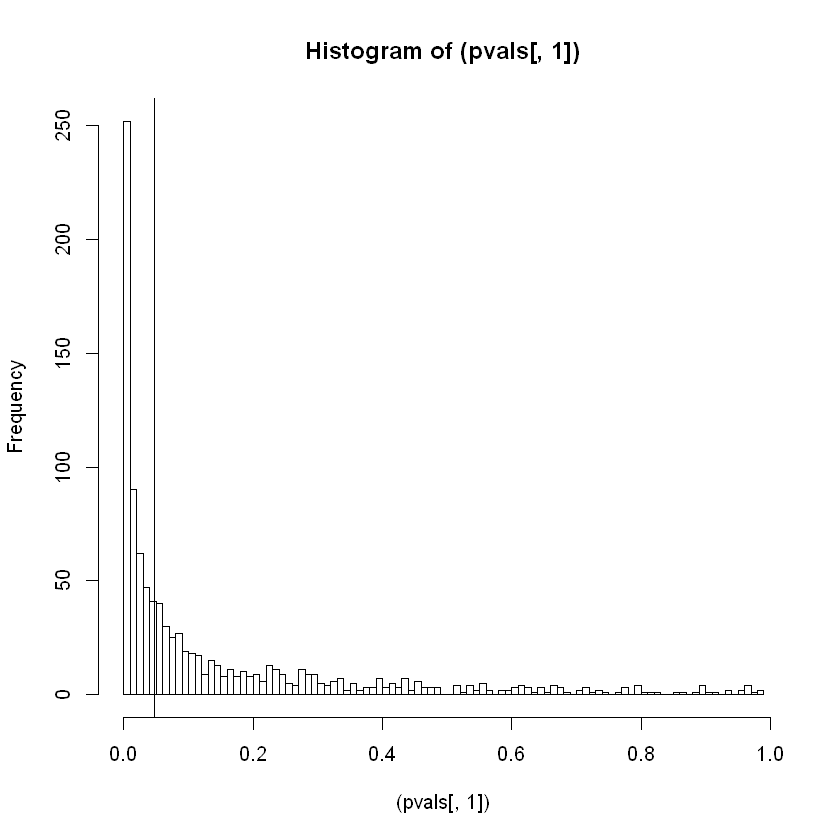

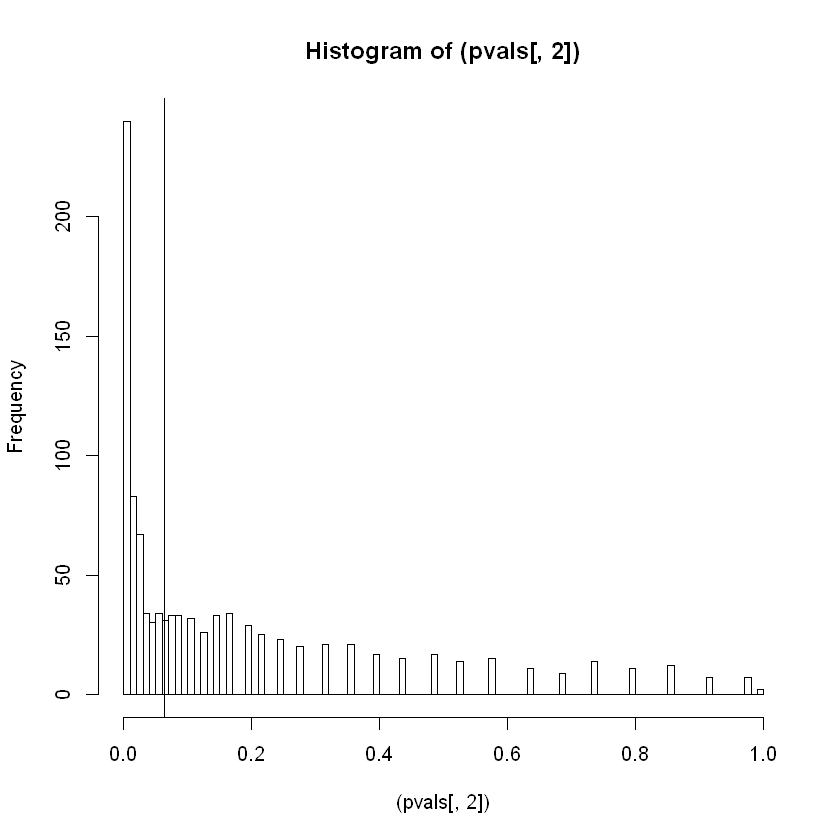

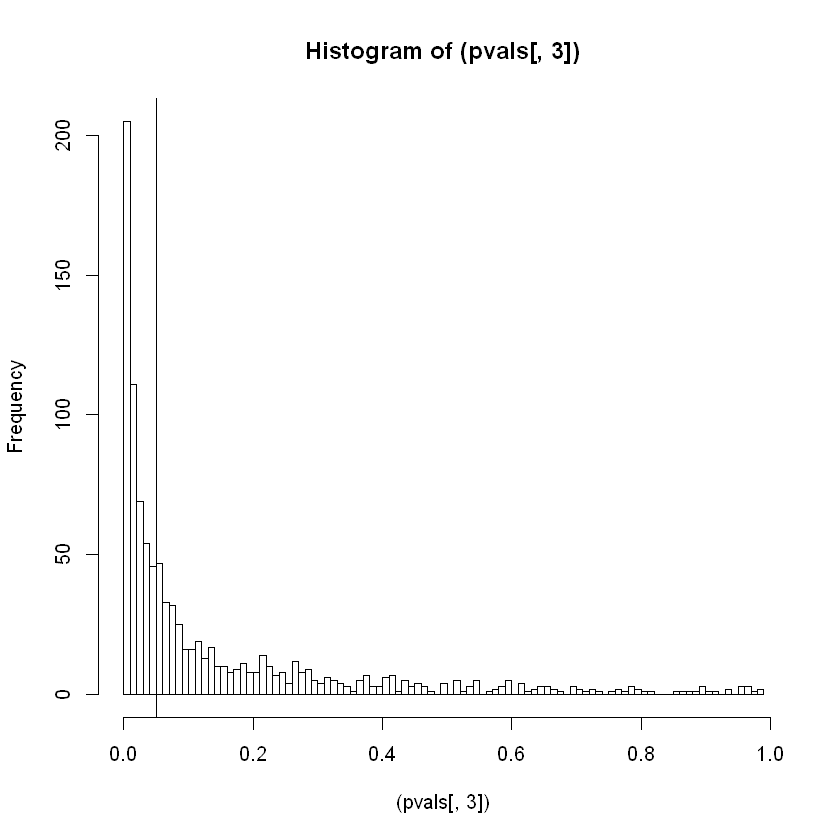

In [14]:
data("PlantGrowth")
library(perm)

# a)
mydat <- PlantGrowth[PlantGrowth$group=="ctrl" | PlantGrowth$group=="trt2",]
head(mydat)
TestCompare <- function(sample1, sample2){
  pval1 <- t.test(sample1,sample2)$p.value
  pval2 <- wilcox.test(sample1,sample2)$p.value
  pval3 <- permTS(sample1,sample2)$p.value
  c(pval1,pval2,pval3)
}

# b)
mypvals <- # continue here

# c)
m1 <- mean(mydat[mydat$group=="ctrl",1])
m2 <- mean(mydat[mydat$group=="trt2",1])
s1 <- sd(mydat[mydat$group=="ctrl",1])
s2 <- sd(mydat[mydat$group=="trt2",1])
n1 <- length(mydat[mydat$group=="ctrl",1])
n2 <- length(mydat[mydat$group=="trt2",1])

pvals <- matrix(NA,ncol=3,nrow=1000)
for (i in 1:1000) {
  # add the results from the corresponding tests here
  pvals[i,] <- TestCompare(rnorm(n1,m1,s1), rnorm(n2,m2,s2))
  
}
ttt <- TestCompare(mydat[mydat$group=="ctrl",1], mydat[mydat$group=="trt2",1])

hist((pvals[,1]),100)
abline(v=ttt[1])
hist((pvals[,2]),100)
abline(v=ttt[2])
hist((pvals[,3]),100)
abline(v=ttt[3])



# d) 
# visualize and compare

##### Question I:  <u>Any idea why the t-test gives the lowest p-value?</u>

_Answer_

##### Question II:  <u>Which test gives the lowest number of p-values from the artificial data which are larger than the p-value calculated for the PlantGrowth data?</u>

_Answer_


### Exercise 5
Redo the first part of Exercise 4 changing to paired tests. 



Warning message:
"package 'exactRankTests' was built under R version 3.5.3" Package 'exactRankTests' is no longer under development.
 Please consider using package 'coin' instead.



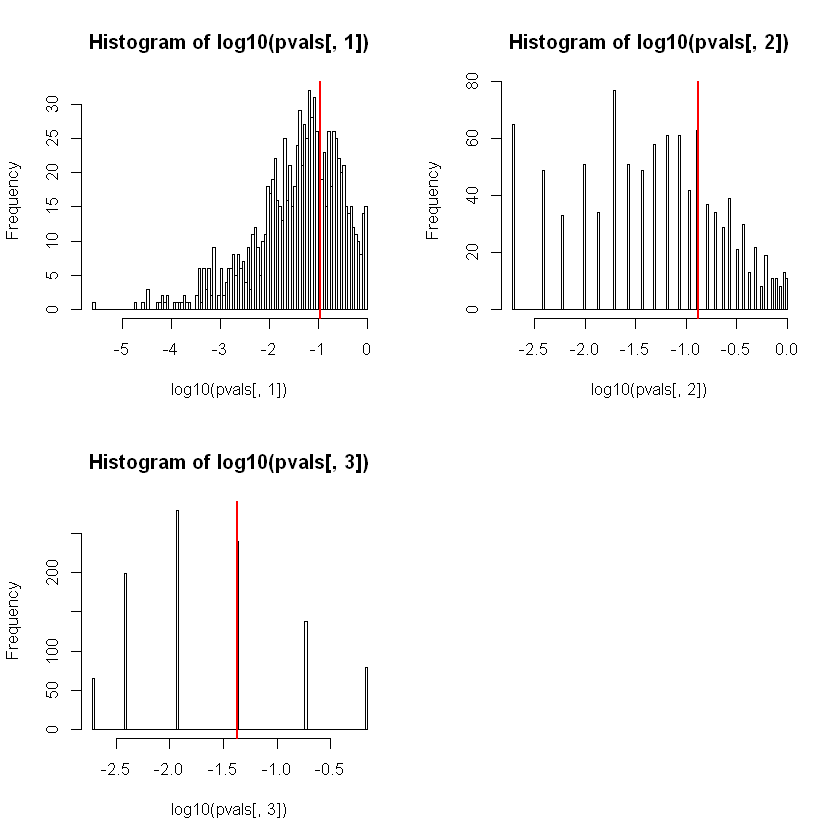

In [15]:
data("PlantGrowth")
library(exactRankTests) 
mydat <- PlantGrowth[PlantGrowth$group=="ctrl" | PlantGrowth$group=="trt2",]
TestCompare <- function(sample1, sample2){
  pval1 <- t.test(sample1,sample2,paired = T)$p.value
  pval2 <- wilcox.test(sample1,sample2,paired = T)$p.value
  # required different implementation
  pval3 <- perm.test(sample1,sample2, paired=T)$p.value
  c(pval1,pval2,pval3)
}
mypvals <- TestCompare(mydat[mydat$group=="ctrl",1], mydat[mydat$group=="trt2",1])

m1 <- mean(mydat[mydat$group=="ctrl",1])
m2 <- mean(mydat[mydat$group=="trt2",1])
s1 <- sd(mydat[mydat$group=="ctrl",1])
s2 <- sd(mydat[mydat$group=="trt2",1])
n1 <- length(mydat[mydat$group=="ctrl",1])
n2 <- length(mydat[mydat$group=="trt2",1])

pvals <- matrix(NA,ncol=3,nrow=1000)
for (i in 1:1000) {
  pvals[i,] <- TestCompare(rnorm(n1,m1,s1), rnorm(n2,m2,s2))
}
par(mfrow=c(2,2))
hist(log10(pvals[,1]),100)
abline(v=log10(mypvals[1]),col=2,lwd=2)
hist(log10(pvals[,2]),100)
abline(v=log10(mypvals[2]),col=2,lwd=2)
hist(log10(pvals[,3]),100)
abline(v=log10(mypvals[3]),col=2,lwd=2)

# Paired tests are necessary when having e.g. drug reponses on the same persons. Paired tests do also decrease the number of possible combinations for the permutation tests, leading to the observed discrete pattern.


##### Question I:  <u>When should you use a paired test? Give an example.</u>

_Answer_

##### Question II:  <u>Which difference in the results do you observe?</u>

_Answer_



### Exercise 6
_Correction for multiple testing:_

a) Write a function to calculate the p-value (t-test) between normally distributed (s.d. 1) artificial sets mutually shifted by $S$ (set default to 0.5). 

b) Write a for loop to get 1000 p-values from the same comparison and plot them on a histogram. Count the number of p-values below 0.05.

c) Correct for multiple testing using Bonferroni, Benjamin-Hochberg (```p.adjust```)and ```qvalue()``` (```qvalues``` package). Count the number of corrected p-values below 0.05.

d) Repeat the same for a shift of $S=1$ and $S=0$. How many corrected p-values below 0.05 would one optimally get for $S=0$?



In [16]:
# a)
GetPval <- function(shift=0.5, num=10) {
  t.test(rnorm(num),rnorm(num,mean=shift))$p.value
}

# b) 
pvec <- vector(,1000)
for (i in 1:1000) {
  # from here this is yours
}

# c)
#p.adjust(yourvalues, method="Bonferroni")
#p.adjust(yourvalues, method="BH")
#qvalue(yourvalues)$qvalues

# d) 
    


##### Question I:  <u>What are the arguments ```shift``` and ```num``` in the function ```GetPval```? What happens when you call the function without arguments (```GetPval()```)</u>

_Answer_

##### Question II:  <u>What is the percentage of p-values below 0.05?</u>


_Answer_

##### Question III:  <u>Why is the number of corrected p-values below 0.05 smaller after correction? Order the corrections according to their number of p-values smaller than 0.05.</u>

_Answer_

##### Question IV:  <u>What is the expected percentage of p-value below 0.01 for $S=0$?</u>

_Answer_
